<a href="https://colab.research.google.com/github/sebagit914/Exam1_Employee_attrition/blob/main/EmployeeAttrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Importar librerías


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2 Montar Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3 Cargar base de datos

Al momento de cargar los datos, la indicación es dejar la variable "EmployeeNumber" como índice. Por lo tanto, se establece al momento de importar los datos.

**El objetivo de esta sección será:**
Asegurar de que se han cargado los datos correctamente
Ver qué tipo de datos contiene
Revisar la validez de los datos

In [ ]:
filename = '/content/drive/MyDrive/PTDataScience/1Examen/employee_attrition.csv'

df = pd.read_csv(filename, index_col= 9)
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,NaN,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,NaN,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,NaN,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,NaN,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,NaN,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,NaN,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
2065,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,4,NaN,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
2068,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2,NaN,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [ ]:
#Utilizamos el atributo shape para conocer la estructura del dataframe. Observamos que contiene 1470 filas y 34 columnas
df.shape

(1470, 34)

In [ ]:
# Verificar los nombres de los atributos y los tipos de datos usando info
df.info

<bound method DataFrame.info of                 Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
EmployeeNumber                 ...                                              
1                41       Yes  ...                       0                     5
2                49        No  ...                       1                     7
4                37       Yes  ...                       0                     0
5                33        No  ...                       3                     0
7                27        No  ...                       2                     2
...             ...       ...  ...                     ...                   ...
2061             36        No  ...                       0                     3
2062             39        No  ...                       1                     7
2064             27        No  ...                       0                     3
2065             49        No  ...                       0                   

In [ ]:
#Constatamos que el nombre de las columnas, estén escritas correctamente.
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
#Finalmente, el atributo dtypes o objeto de conocer el tipo de variable que compone cada columna. La mayoría compuesta preferentemente por datos de tipo entero.
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

# 4 Limpieza de datos

## 4.1 Null Values



In [ ]:
# Método 1 
#Observamos que para los valores nulos , sólo se indica en la columna Género. Habiendo 882 registros nulos sin indicar el tipo de género que representa. 
df.apply(lambda x: sum(x.isnull()))

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                      882
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [ ]:
#Método 2 /Utlizamos un segundo método para constatar la presencia de valores nulos
df.isnull().values.any()

True

In [ ]:
#Ahora , para revisar la composición de los no nulos, aplicamos un groupby, con un gráfico de barras
df['Gender'].value_counts()

Female    588
Name: Gender, dtype: int64

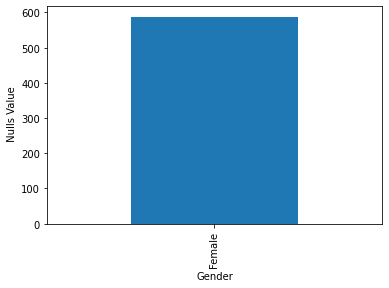

In [ ]:
#Gender Not Null. Observamos que la todos los valores no nulos de la variable genero pertenecen al género femenino
df['Gender'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel(' Nulls Value')
plt.show()

### 4.1.1 Manejo de valores nulos

In [ ]:
## Para este caso se ha determinado llenar los campos nulos con valor 0.
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)


In [ ]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

## 4.2 Eliminar columnas innecesarias

Al observar la data, podemos constatar que tenemos 3 variables con información irrelevante, pues contienen el mismo valor cada una de ellas.

- EmployeesCount: Sólo valores: 1 
 - Standar Hours: Sólo valores: 80 
 - Over18: Sólo valores 'Yes'


In [ ]:
df.drop(columns = ['EmployeeCount','Over18','StandardHours'], inplace = True)



In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# 5 Análisis Exploratorio

El caso plantea realizar un análisis respecto a la fuga de empleados en la compañia. Por lo tanto, los análsisi comparativos se realizaran considerando el objetivo principal del caso.

## 5.1 Análisis General

El análisis general plantea, revisar las diferencias entre aquellos que dejaron la compañia versus aquellos que se mantienen.

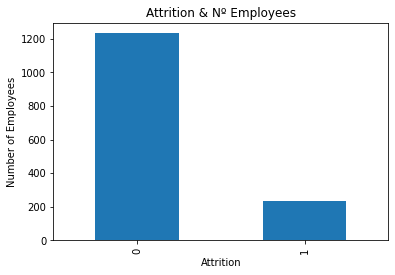

In [ ]:
df['Attrition'].value_counts().plot.bar()
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.title('Attrition & Nº Employees') 
plt.show()


In [ ]:

pd.crosstab(index=df['Attrition'], columns='count')
frec = pd.crosstab(index=df['Attrition'], columns='count')
(frec/frec.sum())*100

col_0,count
Attrition,
No,83.877551
Yes,16.122449


A partir del gráfico y la tabla de frecuencia, evidenciamos que el 83% de los empleados se mantiene aún en la compañia, versus un 16% que ha salido. Todo esto, en el marco de un período de tiempo.  Por lo tanto, el foco de nuestro análisis dependerá en identificar las principales razones que hay detrás de esta fuga de talento.

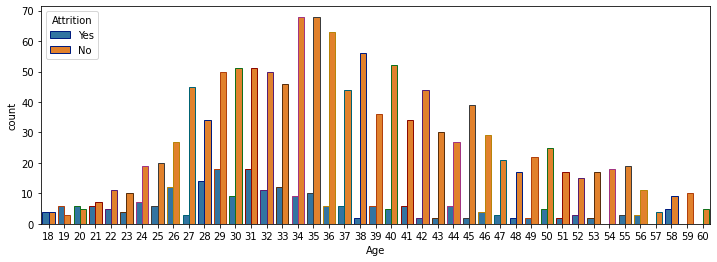

In [ ]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Age', hue='Attrition', 
data = df, ax = ax,  edgecolor=sns.color_palette("dark"));

Se observa que la edad de 29 y 31 años es la edad de salida empleados versus aquella con mayor retención, la edad de 34 y 35 años.

## 5.2 Análisis Attrition

### ¿Qué sucede con el segmento " deserción" ?


In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Observando los números de aquellos que dejaron la empresa. Parece ser bajo en comparación al total. Revisemos el porcentaje

In [ ]:
filtro1 = df['Attrition'] == 'Yes'
df1 = df.loc[filtro1, :]
df1.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Female,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
19,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Female,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Yes,14,3,2,0,6,4,3,4,2,0,3
27,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Female,82,2,1,Sales Representative,1,Single,3407,6986,7,No,23,4,2,0,10,4,3,5,3,0,3
31,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,2,Female,83,3,1,Research Scientist,1,Single,2960,17102,2,No,11,3,3,0,8,2,3,4,2,1,3


La mayor cantidad de empleados corresponde a los solteros

In [ ]:
pd.crosstab(index=df1['MaritalStatus'], columns='count').sort_values(by = 'MaritalStatus', ascending = False)
frec = pd.crosstab(index=df1['MaritalStatus'], columns='count')
(frec/frec.sum())*100

col_0,count
MaritalStatus,
Divorced,13.924051
Married,35.443038
Single,50.632911


In [ ]:
left = df.groupby('Attrition')
left.mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,2.902954,1.945148,2.852321


## Aquí podemos interpretar sólo observando los datos que los empleados que dejaron la empresa:
- Tienen una edad inferior a los que se mantienen

- Son relativamente más jóvenes

- Viven a una distancia mayor del hogar al trabajo

- Tienen un nivel de satisfacción del trabajo medio inferior con aquellos que se mantienen

- Tiene un nivel de satisfacción con el medio ambiente laboral inferior

- Sobre el 50% poseen un estado civil, soltero

- Poseen un salario inferior en comparación con aquellos que se mantienen. Sin embargo, son jovenes con menor cantidad de años en el mundo laboral.

# 6 Preguntas relevantes

Para responder a estas preguntas, realizaremos un análisis de correlación de variabales:

Definición de correlación: La correlación alude a la proporcionalidad y la relación lineal que existe entre distintas variables. Si los valores de una variable se modifican de manera sistemática con respecto a los valores de otra, se dice que ambas variables se encuentran correlacionadas.

Los valores que puede tomar R son: -1≤R≤1, siendo 1relación positiva perfecta y -1 correlación negativa perfecta







In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

**¿Existe una relación entre la deserción de los empleados y la - distancia que viven del trabajo?**

Correlación de -0.0016. No existe relación o bien no existe relación lineal. En este caso la deserción no depende de la distancia del trabajo. No existe una relación específica entre la deserción y la distancia del trabajo.

**¿Existe una tendencia entre los ingresos y la deserción?**
La correlación obtenida es de 0.49 (0.5 aproximadamente). Por lo tanto, podemos inferir que existe una relación positiva moderada.

**¿Qué tipo de empleados tienen mayor riesgo de deserción?**
Empleados, jóvenes solteros entre 29 y 31 años,  con promedio salario mensual de $ USD4.787, con 6 años de empleabilidad promedio, y un sueldo diario de USD 750. 

Según los datos, ¿qué medidas puede tomar RR.HH. para minimizar el desgaste?

Enfocarse en aquellas variables de mayor significancia. Es decir, intentar aumentar el ingreso mensual. Como son empleados jóvenes solteros en su mayoría, ofrecer beneficios anexos al sueldo. Es decir, descuentos en gimnasio, alimentación, salud o bien financiar estudios condicionados a la permanencia en la empresa y por consiguiente aumentar el salario.


In [ ]:
df['Attrition'] = [1 if item == 'Yes' else 0 for item in df['Attrition']]

In [ ]:
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.002305,-0.018214,-0.027656


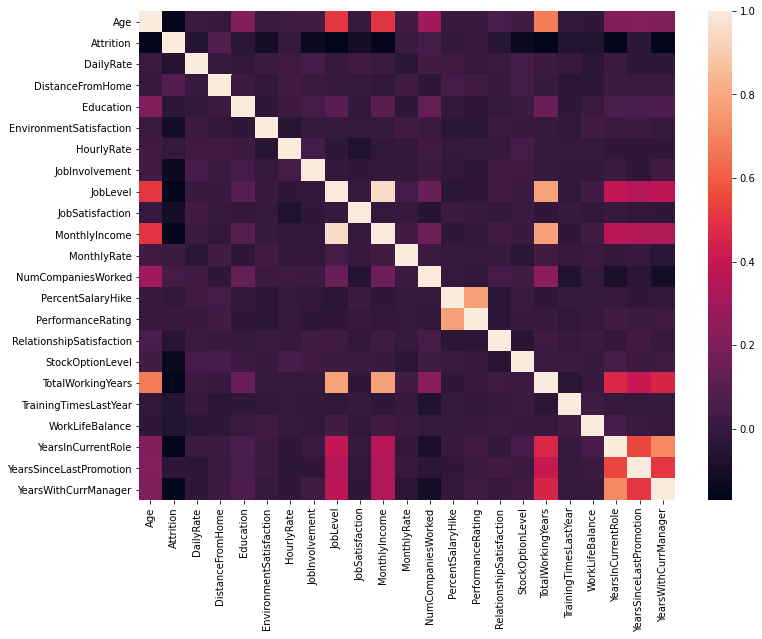

In [ ]:
plt.figure(figsize = (12, 9))
sns.heatmap(df.corr())
plt.show()

# 7 Conclusión

El ingreso mensual parece ser la característica más importante, seguida de la edad, la tarifa diaria y la tarifa mensual de las personas. 
Se infiere que las personas con ingresos más altos tienen menos probabilidades de irse que las personas con ingresos más bajos.
Se observa que la edad de los empleados, puede inducir a que en determinado rango de edad es más probable que el empleado se marche
